In [21]:
import os
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:
dataset = np.load('dataset.np.npy')

In [3]:
print("Dataset shape = ", dataset.shape)

Dataset shape =  (25000, 2)


In [12]:
reviews = dataset.T[1]
sentences = list(map(lambda x: x.split(' '), reviews.tolist()))

print("Revires shape = ", reviews.shape)
print("Sentences length =", len(sentences))

Revires shape =  (25000,)
Sentences length = 25000


In [18]:
# Model for representation
model = Word2Vec(sentences)

In [19]:
top_words = ["like", "good", "story", "would", "even", "really", "time", "show", "bad", "see", "people", "well", "great", "first", "much", "get", "films", "movies", "character", "love"]

In [20]:
dataset = np.vstack(tuple(map(lambda x: model[x], top_words)))
print("Dataset shape = ", dataset.shape)

Dataset shape =  (20, 100)


In [22]:
model = TSNE(n_components=2)

In [23]:
result = model.fit_transform(dataset)

In [27]:
result = np.array([(result.T[0] - result.T[0].mean()) / np.abs(result.T[0]).max(), 
                   (result.T[1] - result.T[1].mean()) / np.abs(result.T[1]).max()]).T.tolist()

In [28]:
import matplotlib.pyplot as plt

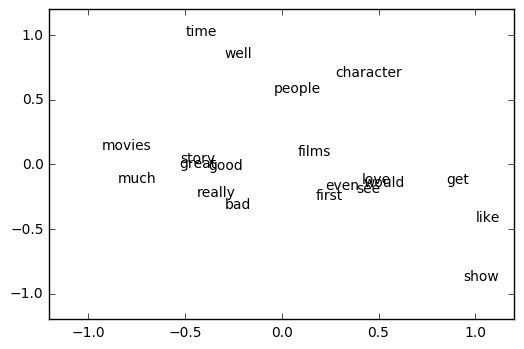

In [32]:
plt.axis([-1.2, 1.2, -1.2, 1.2])
for i in range(len(result)):
    plt.text(result[i][0], result[i][1], top_words[i])
plt.show()